# Build a simple fully connected NN from scratch
This tutorial has been modified from the presented in the "CS231n: Convolutional Neural Networks for Visual Recognition" course of Stanford University.

http://cs231n.stanford.edu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create datasets

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
Xtot = np.zeros((N*K,D)) # data matrix (each row = single example)
y_true_tot = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
    Xtot[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_true_tot[ix] = j

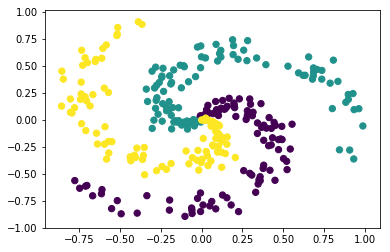

In [3]:
plt.scatter(Xtot[:, 0], Xtot[:, 1], c=y_true_tot[:], s=40, cmap=plt.cm.viridis)
plt.savefig('tutorial1_spiral.pdf')

# Train a Linear Classifier

first we build a linear classifier: this can be thought as a NN with two layers (input and output) where NO activation is applied


<img src="liner_classifier_img.png" alt="drawing" width="300"/>

In [4]:
# initialize parameters randomly
X = Xtot
y_true = y_true_tot
W = np.random.randn(D,K)
b = np.zeros((1,K))

# learning rate
step_size = 1e-0

# gradient descent loop
num_examples = X.shape[0]

for i in range(10000):
  
  # evaluate output
    y = np.dot(X, W) + b 
  
  # compute the class probabilities
    exp_y = np.exp(y)
    probs = exp_y / np.sum(exp_y, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss
    loss = -np.log(probs[range(num_examples),y_true])
    cost = np.sum(loss)/num_examples
    if i % 1000 == 0:
        print("iteration %d: cost %f" % (i, cost))
  
  # derivative w.r.t. y
    dy = probs
    dy[range(num_examples),y_true] -= 1
    dy /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0, keepdims=True)
  
  # perform parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: cost 1.521078
iteration 1000: cost 0.752213
iteration 2000: cost 0.752213
iteration 3000: cost 0.752213
iteration 4000: cost 0.752213
iteration 5000: cost 0.752213
iteration 6000: cost 0.752213
iteration 7000: cost 0.752213
iteration 8000: cost 0.752213
iteration 9000: cost 0.752213


We get accuracy of NN on the training set

In [5]:
output = np.dot(Xtot, W) + b
predicted_class = np.argmax(output, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y_true_tot)))

training accuracy: 0.54


and we plot the results of our classification

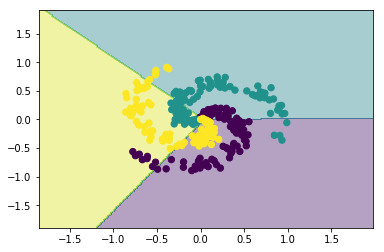

In [6]:
h = 0.02
x_min, x_max = Xtot[:, 0].min() - 1, Xtot[:, 0].max() + 1
y_min, y_max = Xtot[:, 1].min() - 1, Xtot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.4)
plt.scatter(Xtot[:, 0], Xtot[:, 1], c=y_true_tot[:], s=40, cmap=plt.cm.viridis)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.savefig('tutorial1_linear.pdf')

the linear classifier is unable to distinguish the three non linear arms

# Train a fully connected NN

we now add to the linear classifier an hidden layer, made of 100 neurons which are activated with a non linear ReLU function. In this way we are building a proper fully connected NN!


<img src="fully_connected_NN_img.png" alt="drawing" width="300"/>

In [7]:
X = Xtot
y_true = y_true_tot
hL = 100 # size of hidden layer
W1 = 0.01 * np.random.randn(D, hL)
b1 = np.zeros((1,hL))
W2 = 0.01 * np.random.randn(hL, K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
    
    # evaluate class scores
    h = np.maximum(0, np.dot(X, W1) + b1) # note, ReLU activation
    y = np.dot(h, W2) + b2
  
    # compute the class probabilities
    exp_y = np.exp(y)
    probs = exp_y / np.sum(exp_y, axis=1, keepdims=True) 

    # compute loss and cost
    loss = -np.log(probs[range(num_examples),y_true])
    cost = np.sum(loss)/num_examples
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, cost))
  
    # derivative w.r.t. y
    dy = probs
    dy[range(num_examples),y_true] -= 1
    dy /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(h.T, dy)
    db2 = np.sum(dy, axis=0, keepdims=True)
    
    # next backprop into hidden layer
    dh = np.dot(dy, W2.T)
    
    # backprop the ReLU non-linearity
    dh[h <= 0] = 0
    
    # finally into W,b
    dW1 = np.dot(X.T, dh)
    db1 = np.sum(dh, axis=0, keepdims=True)
    
    # perform a parameter update
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098628
iteration 1000: loss 0.148946
iteration 2000: loss 0.067635
iteration 3000: loss 0.048350
iteration 4000: loss 0.039653
iteration 5000: loss 0.034594
iteration 6000: loss 0.031150
iteration 7000: loss 0.028607
iteration 8000: loss 0.026619
iteration 9000: loss 0.024500


We get accuracy of NN on the training set

In [8]:
h = np.maximum(0, np.dot(Xtot, W1) + b1)
y = np.dot(h, W2) + b2
predicted_class = np.argmax(y, axis=1)
print('training accuracy: %.4f' % (np.mean(predicted_class == y_true_tot)))

training accuracy: 0.9900


and plot results

<Figure size 720x864 with 0 Axes>

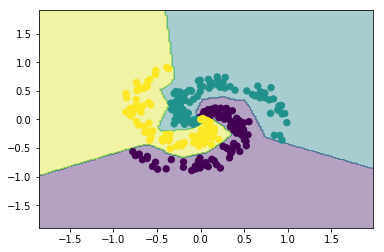

In [9]:
plt.figure(figsize=(10, 12))
# plot the resulting classifier
h = 0.02
x_min, x_max = Xtot[:, 0].min() - 1, Xtot[:, 0].max() + 1
y_min, y_max = Xtot[:, 1].min() - 1, Xtot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.4)
plt.scatter(Xtot[:, 0], Xtot[:, 1], c=y_true_tot, s=40, cmap=plt.cm.viridis)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.savefig('tutorial1_nn.pdf')

# Define and train a similar NN with Keras
In the previous cells we have built our fully connected (dense) NN, step by step, coding the forward  and the backpropagations. 
That is a meaningful excercise to do once in a life, but in practice there is no need for doing that. There exist several opensource libraries for NN. Here we use Keras with Tensorflow backend.

https://keras.io

first we load the needed modules from the keras library

In [11]:
from keras.models import Sequential
from keras.layers import  Dense, Dropout
from keras import losses
from keras.utils import np_utils
from keras.optimizers import Adam

We define our fully connected NN as a Keras Sequential models where layers are add one after the other.

In [13]:
model = Sequential()
model.add(Dense(100, input_dim=2 , activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


the summary of the NN architecture can be easily printed

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


we then compile the model, defining a loss function, an optimizer for computing minimization, and a metric used to get the the NN performance

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

differently from what we have done before we divide our set of data in training (80%), validation (10%) and test (10%) sets. We train the network only on the training set.

In [17]:
Ntot = len(Xtot)
tot_ind = np.arange(Ntot)
train_ind = np.random.choice(tot_ind, int(Ntot*0.8))
tot_ind = np.delete(tot_ind, train_ind)
val_ind = np.random.choice(tot_ind,int(len(tot_ind)/2))
test_ind = np.delete(tot_ind, val_ind)

/Users/niki/Library/miniconda3/envs/py36n/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


In [18]:
y_cat = np_utils.to_categorical(y_true_tot)

We train the model on the training set and validate while training

In [19]:

history = model.fit(Xtot[train_ind], y_cat[train_ind], epochs=1000, 
                    verbose=True, validation_data=(Xtot[val_ind], y_cat[val_ind]))

Instructions for updating:
Use tf.cast instead.
Train on 240 samples, validate on 68 samples
Epoch 1/1000
240/240 [==============================] - 0s 1ms/step - loss: 1.1035 - acc: 0.2917 - val_loss: 1.0832 - val_acc: 0.5441
Epoch 2/1000
240/240 [==============================] - 0s 39us/step - loss: 1.0753 - acc: 0.5417 - val_loss: 1.0593 - val_acc: 0.5882
Epoch 3/1000
240/240 [==============================] - 0s 45us/step - loss: 1.0486 - acc: 0.5833 - val_loss: 1.0332 - val_acc: 0.6324
Epoch 4/1000
240/240 [==============================] - 0s 43us/step - loss: 1.0237 - acc: 0.5875 - val_loss: 1.0090 - val_acc: 0.6324
Epoch 5/1000
240/240 [==============================] - 0s 46us/step - loss: 1.0016 - acc: 0.5917 - val_loss: 0.9858 - val_acc: 0.6176
Epoch 6/1000
240/240 [==============================] - 0s 46us/step - loss: 0.9802 - acc: 0.6042 - val_loss: 0.9629 - val_acc: 0.6324
Epoch 7/1000
240/240 [==============================] - 0s 43us/step - loss: 0.9604 - acc: 0.6042 

Epoch 59/1000
240/240 [==============================] - 0s 49us/step - loss: 0.6023 - acc: 0.6417 - val_loss: 0.5901 - val_acc: 0.7500
Epoch 60/1000
240/240 [==============================] - 0s 48us/step - loss: 0.5982 - acc: 0.6542 - val_loss: 0.5846 - val_acc: 0.7353
Epoch 61/1000
240/240 [==============================] - 0s 55us/step - loss: 0.5934 - acc: 0.6667 - val_loss: 0.5801 - val_acc: 0.7353
Epoch 62/1000
240/240 [==============================] - 0s 45us/step - loss: 0.5889 - acc: 0.6583 - val_loss: 0.5779 - val_acc: 0.7500
Epoch 63/1000
240/240 [==============================] - 0s 55us/step - loss: 0.5852 - acc: 0.6583 - val_loss: 0.5745 - val_acc: 0.7500
Epoch 64/1000
240/240 [==============================] - 0s 47us/step - loss: 0.5813 - acc: 0.6708 - val_loss: 0.5707 - val_acc: 0.7647
Epoch 65/1000
240/240 [==============================] - 0s 48us/step - loss: 0.5762 - acc: 0.6833 - val_loss: 0.5672 - val_acc: 0.7647
Epoch 66/1000
240/240 [=========================

240/240 [==============================] - 0s 39us/step - loss: 0.3758 - acc: 0.8917 - val_loss: 0.3975 - val_acc: 0.8676
Epoch 120/1000
240/240 [==============================] - 0s 44us/step - loss: 0.3723 - acc: 0.8833 - val_loss: 0.3946 - val_acc: 0.8676
Epoch 121/1000
240/240 [==============================] - 0s 37us/step - loss: 0.3689 - acc: 0.8875 - val_loss: 0.3885 - val_acc: 0.8676
Epoch 122/1000
240/240 [==============================] - 0s 37us/step - loss: 0.3666 - acc: 0.8875 - val_loss: 0.3833 - val_acc: 0.8676
Epoch 123/1000
240/240 [==============================] - 0s 38us/step - loss: 0.3648 - acc: 0.8875 - val_loss: 0.3794 - val_acc: 0.8676
Epoch 124/1000
240/240 [==============================] - 0s 40us/step - loss: 0.3612 - acc: 0.8958 - val_loss: 0.3809 - val_acc: 0.8676
Epoch 125/1000
240/240 [==============================] - 0s 39us/step - loss: 0.3581 - acc: 0.8958 - val_loss: 0.3795 - val_acc: 0.8676
Epoch 126/1000
240/240 [==============================] 

Epoch 179/1000
240/240 [==============================] - 0s 47us/step - loss: 0.2449 - acc: 0.9458 - val_loss: 0.2844 - val_acc: 0.8971
Epoch 180/1000
240/240 [==============================] - 0s 45us/step - loss: 0.2433 - acc: 0.9458 - val_loss: 0.2828 - val_acc: 0.8971
Epoch 181/1000
240/240 [==============================] - 0s 37us/step - loss: 0.2424 - acc: 0.9333 - val_loss: 0.2807 - val_acc: 0.8971
Epoch 182/1000
240/240 [==============================] - 0s 38us/step - loss: 0.2404 - acc: 0.9500 - val_loss: 0.2803 - val_acc: 0.8971
Epoch 183/1000
240/240 [==============================] - 0s 42us/step - loss: 0.2388 - acc: 0.9458 - val_loss: 0.2809 - val_acc: 0.8971
Epoch 184/1000
240/240 [==============================] - 0s 36us/step - loss: 0.2376 - acc: 0.9458 - val_loss: 0.2797 - val_acc: 0.8824
Epoch 185/1000
240/240 [==============================] - 0s 38us/step - loss: 0.2357 - acc: 0.9458 - val_loss: 0.2798 - val_acc: 0.8824
Epoch 186/1000
240/240 [=================

Epoch 239/1000
240/240 [==============================] - 0s 52us/step - loss: 0.1746 - acc: 0.9667 - val_loss: 0.2308 - val_acc: 0.9118
Epoch 240/1000
240/240 [==============================] - 0s 43us/step - loss: 0.1733 - acc: 0.9667 - val_loss: 0.2309 - val_acc: 0.9118
Epoch 241/1000
240/240 [==============================] - 0s 53us/step - loss: 0.1728 - acc: 0.9667 - val_loss: 0.2306 - val_acc: 0.9118
Epoch 242/1000
240/240 [==============================] - 0s 50us/step - loss: 0.1717 - acc: 0.9667 - val_loss: 0.2307 - val_acc: 0.9118
Epoch 243/1000
240/240 [==============================] - 0s 46us/step - loss: 0.1710 - acc: 0.9667 - val_loss: 0.2291 - val_acc: 0.9118
Epoch 244/1000
240/240 [==============================] - 0s 41us/step - loss: 0.1699 - acc: 0.9667 - val_loss: 0.2290 - val_acc: 0.9118
Epoch 245/1000
240/240 [==============================] - 0s 49us/step - loss: 0.1694 - acc: 0.9667 - val_loss: 0.2265 - val_acc: 0.9118
Epoch 246/1000
240/240 [=================

Epoch 299/1000
240/240 [==============================] - 0s 45us/step - loss: 0.1317 - acc: 0.9667 - val_loss: 0.1987 - val_acc: 0.9118
Epoch 300/1000
240/240 [==============================] - 0s 48us/step - loss: 0.1311 - acc: 0.9667 - val_loss: 0.1977 - val_acc: 0.9118
Epoch 301/1000
240/240 [==============================] - 0s 46us/step - loss: 0.1306 - acc: 0.9667 - val_loss: 0.1981 - val_acc: 0.9118
Epoch 302/1000
240/240 [==============================] - 0s 52us/step - loss: 0.1301 - acc: 0.9667 - val_loss: 0.1963 - val_acc: 0.9118
Epoch 303/1000
240/240 [==============================] - 0s 44us/step - loss: 0.1295 - acc: 0.9667 - val_loss: 0.1961 - val_acc: 0.9118
Epoch 304/1000
240/240 [==============================] - 0s 56us/step - loss: 0.1287 - acc: 0.9667 - val_loss: 0.1951 - val_acc: 0.9118
Epoch 305/1000
240/240 [==============================] - 0s 41us/step - loss: 0.1283 - acc: 0.9667 - val_loss: 0.1952 - val_acc: 0.9118
Epoch 306/1000
240/240 [=================

240/240 [==============================] - 0s 44us/step - loss: 0.1040 - acc: 0.9708 - val_loss: 0.1849 - val_acc: 0.9265
Epoch 359/1000
240/240 [==============================] - 0s 44us/step - loss: 0.1036 - acc: 0.9708 - val_loss: 0.1840 - val_acc: 0.9265
Epoch 360/1000
240/240 [==============================] - 0s 41us/step - loss: 0.1033 - acc: 0.9708 - val_loss: 0.1838 - val_acc: 0.9265
Epoch 361/1000
240/240 [==============================] - 0s 53us/step - loss: 0.1029 - acc: 0.9708 - val_loss: 0.1820 - val_acc: 0.9265
Epoch 362/1000
240/240 [==============================] - 0s 38us/step - loss: 0.1030 - acc: 0.9708 - val_loss: 0.1801 - val_acc: 0.9265
Epoch 363/1000
240/240 [==============================] - 0s 42us/step - loss: 0.1024 - acc: 0.9708 - val_loss: 0.1818 - val_acc: 0.9265
Epoch 364/1000
240/240 [==============================] - 0s 51us/step - loss: 0.1017 - acc: 0.9708 - val_loss: 0.1807 - val_acc: 0.9265
Epoch 365/1000
240/240 [==============================] 

Epoch 418/1000
240/240 [==============================] - 0s 44us/step - loss: 0.0842 - acc: 0.9875 - val_loss: 0.1685 - val_acc: 0.9265
Epoch 419/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0837 - acc: 0.9750 - val_loss: 0.1670 - val_acc: 0.9265
Epoch 420/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0836 - acc: 0.9708 - val_loss: 0.1667 - val_acc: 0.9265
Epoch 421/1000
240/240 [==============================] - 0s 50us/step - loss: 0.0833 - acc: 0.9708 - val_loss: 0.1670 - val_acc: 0.9265
Epoch 422/1000
240/240 [==============================] - 0s 45us/step - loss: 0.0838 - acc: 0.9708 - val_loss: 0.1701 - val_acc: 0.9265
Epoch 423/1000
240/240 [==============================] - 0s 47us/step - loss: 0.0827 - acc: 0.9833 - val_loss: 0.1684 - val_acc: 0.9265
Epoch 424/1000
240/240 [==============================] - 0s 45us/step - loss: 0.0825 - acc: 0.9708 - val_loss: 0.1662 - val_acc: 0.9265
Epoch 425/1000
240/240 [=================

Epoch 478/1000
240/240 [==============================] - 0s 40us/step - loss: 0.0697 - acc: 0.9875 - val_loss: 0.1620 - val_acc: 0.9265
Epoch 479/1000
240/240 [==============================] - 0s 38us/step - loss: 0.0696 - acc: 0.9875 - val_loss: 0.1621 - val_acc: 0.9265
Epoch 480/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0693 - acc: 0.9875 - val_loss: 0.1613 - val_acc: 0.9265
Epoch 481/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0691 - acc: 0.9875 - val_loss: 0.1608 - val_acc: 0.9265
Epoch 482/1000
240/240 [==============================] - 0s 43us/step - loss: 0.0690 - acc: 0.9875 - val_loss: 0.1604 - val_acc: 0.9265
Epoch 483/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0687 - acc: 0.9875 - val_loss: 0.1597 - val_acc: 0.9265
Epoch 484/1000
240/240 [==============================] - 0s 38us/step - loss: 0.0685 - acc: 0.9875 - val_loss: 0.1585 - val_acc: 0.9265
Epoch 485/1000
240/240 [=================

Epoch 538/1000
240/240 [==============================] - 0s 45us/step - loss: 0.0590 - acc: 0.9875 - val_loss: 0.1506 - val_acc: 0.9412
Epoch 539/1000
240/240 [==============================] - 0s 40us/step - loss: 0.0590 - acc: 0.9917 - val_loss: 0.1523 - val_acc: 0.9412
Epoch 540/1000
240/240 [==============================] - 0s 34us/step - loss: 0.0588 - acc: 0.9917 - val_loss: 0.1511 - val_acc: 0.9412
Epoch 541/1000
240/240 [==============================] - 0s 38us/step - loss: 0.0589 - acc: 0.9875 - val_loss: 0.1503 - val_acc: 0.9412
Epoch 542/1000
240/240 [==============================] - 0s 43us/step - loss: 0.0591 - acc: 0.9875 - val_loss: 0.1499 - val_acc: 0.9412
Epoch 543/1000
240/240 [==============================] - 0s 45us/step - loss: 0.0583 - acc: 0.9875 - val_loss: 0.1503 - val_acc: 0.9412
Epoch 544/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0581 - acc: 0.9875 - val_loss: 0.1523 - val_acc: 0.9412
Epoch 545/1000
240/240 [=================

Epoch 598/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0510 - acc: 0.9917 - val_loss: 0.1478 - val_acc: 0.9412
Epoch 599/1000
240/240 [==============================] - 0s 37us/step - loss: 0.0509 - acc: 0.9917 - val_loss: 0.1468 - val_acc: 0.9412
Epoch 600/1000
240/240 [==============================] - 0s 36us/step - loss: 0.0509 - acc: 0.9917 - val_loss: 0.1471 - val_acc: 0.9412
Epoch 601/1000
240/240 [==============================] - 0s 38us/step - loss: 0.0507 - acc: 0.9917 - val_loss: 0.1459 - val_acc: 0.9412
Epoch 602/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0508 - acc: 0.9917 - val_loss: 0.1463 - val_acc: 0.9412
Epoch 603/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0505 - acc: 0.9917 - val_loss: 0.1472 - val_acc: 0.9412
Epoch 604/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0504 - acc: 0.9917 - val_loss: 0.1486 - val_acc: 0.9412
Epoch 605/1000
240/240 [=================

Epoch 658/1000
240/240 [==============================] - 0s 54us/step - loss: 0.0449 - acc: 0.9917 - val_loss: 0.1452 - val_acc: 0.9412
Epoch 659/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0446 - acc: 0.9917 - val_loss: 0.1469 - val_acc: 0.9412
Epoch 660/1000
240/240 [==============================] - 0s 47us/step - loss: 0.0445 - acc: 0.9917 - val_loss: 0.1473 - val_acc: 0.9412
Epoch 661/1000
240/240 [==============================] - 0s 45us/step - loss: 0.0444 - acc: 0.9917 - val_loss: 0.1472 - val_acc: 0.9412
Epoch 662/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0446 - acc: 0.9917 - val_loss: 0.1470 - val_acc: 0.9412
Epoch 663/1000
240/240 [==============================] - 0s 46us/step - loss: 0.0443 - acc: 0.9917 - val_loss: 0.1490 - val_acc: 0.9412
Epoch 664/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0442 - acc: 0.9917 - val_loss: 0.1506 - val_acc: 0.9412
Epoch 665/1000
240/240 [=================

Epoch 718/1000
240/240 [==============================] - 0s 50us/step - loss: 0.0398 - acc: 0.9917 - val_loss: 0.1531 - val_acc: 0.9412
Epoch 719/1000
240/240 [==============================] - 0s 46us/step - loss: 0.0397 - acc: 0.9917 - val_loss: 0.1543 - val_acc: 0.9412
Epoch 720/1000
240/240 [==============================] - 0s 52us/step - loss: 0.0398 - acc: 0.9917 - val_loss: 0.1559 - val_acc: 0.9412
Epoch 721/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0396 - acc: 0.9917 - val_loss: 0.1562 - val_acc: 0.9412
Epoch 722/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0394 - acc: 0.9917 - val_loss: 0.1554 - val_acc: 0.9412
Epoch 723/1000
240/240 [==============================] - 0s 47us/step - loss: 0.0394 - acc: 0.9917 - val_loss: 0.1542 - val_acc: 0.9412
Epoch 724/1000
240/240 [==============================] - 0s 44us/step - loss: 0.0393 - acc: 0.9917 - val_loss: 0.1541 - val_acc: 0.9412
Epoch 725/1000
240/240 [=================

Epoch 778/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0358 - acc: 0.9917 - val_loss: 0.1569 - val_acc: 0.9412
Epoch 779/1000
240/240 [==============================] - 0s 37us/step - loss: 0.0357 - acc: 0.9917 - val_loss: 0.1551 - val_acc: 0.9412
Epoch 780/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0357 - acc: 0.9917 - val_loss: 0.1565 - val_acc: 0.9412
Epoch 781/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0357 - acc: 0.9917 - val_loss: 0.1580 - val_acc: 0.9412
Epoch 782/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0355 - acc: 0.9917 - val_loss: 0.1585 - val_acc: 0.9412
Epoch 783/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0356 - acc: 0.9917 - val_loss: 0.1576 - val_acc: 0.9412
Epoch 784/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0354 - acc: 0.9917 - val_loss: 0.1596 - val_acc: 0.9412
Epoch 785/1000
240/240 [=================

Epoch 838/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0325 - acc: 0.9917 - val_loss: 0.1638 - val_acc: 0.9412
Epoch 839/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0324 - acc: 0.9917 - val_loss: 0.1644 - val_acc: 0.9412
Epoch 840/1000
240/240 [==============================] - 0s 40us/step - loss: 0.0325 - acc: 0.9917 - val_loss: 0.1660 - val_acc: 0.9412
Epoch 841/1000
240/240 [==============================] - 0s 40us/step - loss: 0.0325 - acc: 0.9917 - val_loss: 0.1621 - val_acc: 0.9412
Epoch 842/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0323 - acc: 0.9917 - val_loss: 0.1617 - val_acc: 0.9412
Epoch 843/1000
240/240 [==============================] - 0s 43us/step - loss: 0.0322 - acc: 0.9917 - val_loss: 0.1635 - val_acc: 0.9412
Epoch 844/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0321 - acc: 0.9917 - val_loss: 0.1648 - val_acc: 0.9412
Epoch 845/1000
240/240 [=================

Epoch 898/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0297 - acc: 0.9917 - val_loss: 0.1654 - val_acc: 0.9412
Epoch 899/1000
240/240 [==============================] - 0s 53us/step - loss: 0.0297 - acc: 0.9917 - val_loss: 0.1630 - val_acc: 0.9412
Epoch 900/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0295 - acc: 0.9917 - val_loss: 0.1604 - val_acc: 0.9412
Epoch 901/1000
240/240 [==============================] - 0s 48us/step - loss: 0.0295 - acc: 0.9917 - val_loss: 0.1596 - val_acc: 0.9412
Epoch 902/1000
240/240 [==============================] - 0s 44us/step - loss: 0.0298 - acc: 0.9917 - val_loss: 0.1582 - val_acc: 0.9412
Epoch 903/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0293 - acc: 0.9917 - val_loss: 0.1618 - val_acc: 0.9412
Epoch 904/1000
240/240 [==============================] - 0s 45us/step - loss: 0.0293 - acc: 0.9917 - val_loss: 0.1633 - val_acc: 0.9412
Epoch 905/1000
240/240 [=================

Epoch 958/1000
240/240 [==============================] - 0s 42us/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.1706 - val_acc: 0.9412
Epoch 959/1000
240/240 [==============================] - 0s 43us/step - loss: 0.0271 - acc: 0.9917 - val_loss: 0.1690 - val_acc: 0.9412
Epoch 960/1000
240/240 [==============================] - 0s 40us/step - loss: 0.0271 - acc: 0.9917 - val_loss: 0.1693 - val_acc: 0.9412
Epoch 961/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.1688 - val_acc: 0.9412
Epoch 962/1000
240/240 [==============================] - 0s 41us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.1668 - val_acc: 0.9412
Epoch 963/1000
240/240 [==============================] - 0s 40us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.1662 - val_acc: 0.9412
Epoch 964/1000
240/240 [==============================] - 0s 39us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.1645 - val_acc: 0.9412
Epoch 965/1000
240/240 [=================

The performance of the NN during training are saved in a python dictoray

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

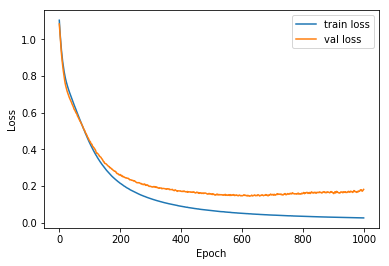

In [21]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

We can evaluate the trained model

In [23]:
print(model.evaluate(Xtot[train_ind], y_cat[train_ind]))
print('')
print(model.evaluate(Xtot[test_ind], y_cat[test_ind]))

240/240 [==============================] - 0s 39us/step
[0.025594457083692155, 0.9916666666666667]

109/109 [==============================] - 0s 37us/step
[0.08809019855133882, 0.9724770642201835]


predict classes

In [24]:
y_test = model.predict(Xtot[test_ind])

and plot results

(-1.8931217969374865, 1.8868782030625169)

<Figure size 720x864 with 0 Axes>

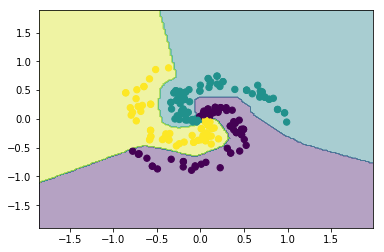

In [25]:
sub_set = train_ind
plt.figure(figsize=(10, 12))
# plot the resulting classifier
h = 0.02
x_min, x_max = Xtot[sub_set, 0].min() - 1, Xtot[sub_set, 0].max() + 1
y_min, y_max = Xtot[sub_set, 1].min() - 1, Xtot[sub_set, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.4)
plt.scatter(Xtot[sub_set, 0], Xtot[sub_set, 1], c=y_true_tot[sub_set], s=40, cmap=plt.cm.viridis)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
